Marks: 5 out of 5



**Skibgram + cbow+fastext**

skipgram

In [ ]:
!pip install gensim

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnltk 0.7.8 requires numpy==2.0.2, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.18.0 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.

In [ ]:

from gensim.models import Word2Vec

In [ ]:
corpus = [
    "আমি ভাত খাই",
    "আমি মাছ খাই",
    "আমি বাংলা গান শুনি",
    "বাংলা গান সুন্দর",
    "আমি বই পড়ি",
    "তুমি গান শুনো",
    "সে ভাত খায়",
    "তারা মাছ খায়"
]
tokenized_corpus = [sentence.split() for sentence in corpus]

In [ ]:
skipgram_model=Word2Vec(
    sentences=tokenized_corpus,
    vector_size=50,
    window=3,
    sg=1,
    min_count=1,
    workers=4,
    epochs=100
)
print(skipgram_model.wv['খাই'])

[ 2.86250864e-03 -5.30506764e-03 -1.41529879e-02 -1.56141603e-02
 -1.82710066e-02 -1.18813058e-02 -3.67452297e-03 -8.64935666e-03
 -1.29634039e-02 -7.45910499e-03  8.57528113e-03 -7.49540841e-03
  1.67620815e-02  3.05259414e-03 -1.44895455e-02  1.88764203e-02
  1.52810821e-02  1.09993098e-02 -1.37288999e-02  1.16339605e-02
  8.00666865e-03  1.03746438e-02  8.55032448e-03  3.89553909e-03
 -6.34124363e-03  1.67116914e-02  1.92304291e-02  7.59767694e-03
 -5.68464305e-03  3.38962564e-05  2.45970115e-03 -1.69535633e-02
 -1.64609943e-02 -4.99937043e-04  2.47007702e-03 -1.14959283e-02
 -9.43298917e-03 -1.46923289e-02  1.66672468e-02  2.44024021e-04
 -8.99442192e-03  1.13953063e-02  1.83407795e-02 -8.21185391e-03
  1.59546472e-02  1.07636685e-02  1.17752086e-02  1.01863802e-03
  1.64317321e-02 -1.40435416e-02]


In [ ]:
skipgram_model.wv.most_similar("ভাত")

[('খাই', 0.18475624918937683),
 ('তুমি', 0.17035025358200073),
 ('তারা', 0.11330927908420563),
 ('খায়', 0.09231119602918625),
 ('শুনো', 0.09120279550552368),
 ('গান', 0.07643721252679825),
 ('পড়ি', 0.06287960708141327),
 ('সুন্দর', -0.01287371851503849),
 ('বই', -0.028228500857949257),
 ('শুনি', -0.032663870602846146)]

cbow

In [ ]:
cbow_model=Word2Vec(
    sentences=tokenized_corpus,
    vector_size=50,
    window=3,
    sg=0,
    min_count=1,
    workers=4,
    epochs=100
)
print(cbow_model.wv['খাই'])

[ 2.85001379e-03 -5.29051060e-03 -1.41541380e-02 -1.56093445e-02
 -1.82469003e-02 -1.18926791e-02 -3.65544925e-03 -8.63857288e-03
 -1.29642216e-02 -7.46444613e-03  8.59516487e-03 -7.49365054e-03
  1.67563222e-02  3.06479796e-03 -1.44852325e-02  1.88804623e-02
  1.53109543e-02  1.10299774e-02 -1.37400078e-02  1.16206445e-02
  8.02725554e-03  1.03700394e-02  8.58234987e-03  3.88562796e-03
 -6.33709319e-03  1.67269595e-02  1.92298423e-02  7.60226883e-03
 -5.69229154e-03  2.82309302e-05  2.48113158e-03 -1.69376321e-02
 -1.64570790e-02 -4.94649634e-04  2.46435287e-03 -1.14827882e-02
 -9.42386873e-03 -1.47014763e-02  1.66575592e-02  2.55642110e-04
 -8.97180289e-03  1.13841807e-02  1.83512270e-02 -8.22354201e-03
  1.59810744e-02  1.07963914e-02  1.17610209e-02  9.86972125e-04
  1.64287146e-02 -1.40490402e-02]


In [ ]:
cbow_model.wv.most_similar("ভাত")

[('খাই', 0.18489205837249756),
 ('তুমি', 0.1705847829580307),
 ('তারা', 0.11393806338310242),
 ('শুনো', 0.09185807406902313),
 ('খায়', 0.09141471236944199),
 ('গান', 0.07775329053401947),
 ('পড়ি', 0.0648203045129776),
 ('সুন্দর', -0.012426929548382759),
 ('বই', -0.026328854262828827),
 ('শুনি', -0.03245813027024269)]

fasttext

In [ ]:
from gensim.models import FastText

fasttext_model = FastText(
    sentences=tokenized_corpus,
    vector_size=50,
    window=3,
    min_count=1,
    workers=4,
    sg=0,
    epochs=50
)
print(fasttext_model.wv['খাই'])

[ 1.7193957e-03  5.1044202e-03  2.7926157e-03 -3.4746092e-03
  5.3936884e-07 -1.2267103e-02  3.5535446e-03 -4.6593705e-03
 -9.0201170e-04  3.1281665e-03  1.9730646e-03  2.6719790e-04
  9.0158201e-04  4.9642348e-03 -2.2900038e-04 -2.7834682e-03
 -2.7266932e-03  3.7267406e-03 -1.0750003e-03  8.0480613e-04
  2.7262319e-03  2.1387425e-03  7.6516876e-03  3.6392936e-03
 -8.5032411e-04 -1.0367318e-03 -6.4352527e-03  8.1454664e-03
 -3.5448889e-03  1.8381644e-03  4.5276101e-04 -2.4399150e-03
  5.9901932e-03  6.4613218e-03 -4.8256433e-03 -7.6782322e-03
 -1.7455063e-03  3.0054997e-03 -7.6001012e-03  5.7503218e-03
 -1.0525247e-03  6.6438755e-03 -5.5022836e-03 -7.9305749e-03
  1.9596692e-03 -1.4523624e-03  1.0374031e-03 -5.6437548e-05
 -4.0935026e-03  4.5193760e-03]


In [ ]:
fasttext_model.wv.most_similar("ভাত")

[('সুন্দর', 0.21731802821159363),
 ('আমি', 0.19402159750461578),
 ('খায়', 0.07767771929502487),
 ('খাই', 0.07067994028329849),
 ('শুনি', 0.05643180385231972),
 ('মাছ', 0.03493741154670715),
 ('শুনো', 0.003609576029703021),
 ('তুমি', -0.0026821126230061054),
 ('বই', -0.023671040311455727),
 ('গান', -0.03313001990318298)]

**Combine cbow+skibgram+fasttext**

In [ ]:
def combine_SCF(word):
  if word not in tokenized_corpus:
    return fasttext_model.wv[word]
  else :
    avg_vector = (cbow_model.wv[word] + skipgram_model.wv[word] + fasttext_model.wv[word])/3
    return avg_vector

In [ ]:
combine_SCF("খাই")

array([ 1.7193957e-03,  5.1044202e-03,  2.7926157e-03, -3.4746092e-03,
        5.3936884e-07, -1.2267103e-02,  3.5535446e-03, -4.6593705e-03,
       -9.0201170e-04,  3.1281665e-03,  1.9730646e-03,  2.6719790e-04,
        9.0158201e-04,  4.9642348e-03, -2.2900038e-04, -2.7834682e-03,
       -2.7266932e-03,  3.7267406e-03, -1.0750003e-03,  8.0480613e-04,
        2.7262319e-03,  2.1387425e-03,  7.6516876e-03,  3.6392936e-03,
       -8.5032411e-04, -1.0367318e-03, -6.4352527e-03,  8.1454664e-03,
       -3.5448889e-03,  1.8381644e-03,  4.5276101e-04, -2.4399150e-03,
        5.9901932e-03,  6.4613218e-03, -4.8256433e-03, -7.6782322e-03,
       -1.7455063e-03,  3.0054997e-03, -7.6001012e-03,  5.7503218e-03,
       -1.0525247e-03,  6.6438755e-03, -5.5022836e-03, -7.9305749e-03,
        1.9596692e-03, -1.4523624e-03,  1.0374031e-03, -5.6437548e-05,
       -4.0935026e-03,  4.5193760e-03], dtype=float32)

In [ ]:
combine_SCF("do")

array([-0.01043312, -0.00822448, -0.00880005, -0.00277473,  0.0017868 ,
        0.00120263, -0.00828883, -0.0054098 , -0.00601622,  0.00018821,
       -0.00587209,  0.00255161, -0.0033573 ,  0.00577224,  0.00440568,
        0.00766663,  0.00415678, -0.00743622,  0.00345937, -0.00024091,
       -0.00879179, -0.00226686,  0.00312269,  0.01363787, -0.0021709 ,
       -0.00965148, -0.0061096 ,  0.00792989, -0.011861  , -0.00227032,
        0.00074733, -0.00521102, -0.00124364, -0.01143598, -0.00138074,
        0.00562429, -0.00559591,  0.0066074 ,  0.00622179,  0.0050819 ,
       -0.00782444,  0.00275019, -0.0094722 ,  0.01444176, -0.00554293,
        0.00119014, -0.00266627,  0.00319736, -0.00054127, -0.00497492],
      dtype=float32)

**Combine Cbow+skipgram**

In [ ]:
def combine_SC(word):
  avg_vector = (cbow_model.wv[word] + skipgram_model.wv[word]) / 2
  return avg_vector

In [ ]:
combine_SC("খাই")

array([ 2.85626110e-03, -5.29778935e-03, -1.41535625e-02, -1.56117529e-02,
       -1.82589535e-02, -1.18869925e-02, -3.66498623e-03, -8.64396431e-03,
       -1.29638128e-02, -7.46177556e-03,  8.58522300e-03, -7.49452971e-03,
        1.67592019e-02,  3.05869617e-03, -1.44873895e-02,  1.88784413e-02,
        1.52960178e-02,  1.10146441e-02, -1.37344543e-02,  1.16273025e-02,
        8.01696256e-03,  1.03723416e-02,  8.56633671e-03,  3.89058352e-03,
       -6.33916818e-03,  1.67193264e-02,  1.92301348e-02,  7.59997312e-03,
       -5.68846706e-03,  3.10635951e-05,  2.47041648e-03, -1.69455968e-02,
       -1.64590366e-02, -4.97293309e-04,  2.46721506e-03, -1.14893578e-02,
       -9.42842849e-03, -1.46969026e-02,  1.66624039e-02,  2.49833072e-04,
       -8.98311287e-03,  1.13897435e-02,  1.83460042e-02, -8.21769796e-03,
        1.59678608e-02,  1.07800299e-02,  1.17681148e-02,  1.00280507e-03,
        1.64302234e-02, -1.40462909e-02], dtype=float32)

Marks: 4 out of 5

**TF-idf-icf+ n grams**

tfidf+n-grams

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [ ]:
!pip install bnltk

In [ ]:
from bnltk.tokenize import Tokenizers
bn_tokenizer = Tokenizers()
def bengali_tokenizer(text):
    return bn_tokenizer.bn_word_tokenizer(text)

In [ ]:
data = pd.DataFrame({
    "text": [
        "আমি ভাত খাই", "আমি মাছ খাই",
        "আমি গান শুনি", "বাংলা গান সুন্দর",
        "আমি বই পড়ি", "তুমি গান শুনো",
        "সে ভাত খায়", "তারা মাছ খায়"
    ],
    "category": [
        "food", "food", "music", "music",
        "books", "music", "food", "food"
    ]
})

vectorizer = TfidfVectorizer(
    tokenizer=bengali_tokenizer,
    ngram_range=(2,2))
X_tfidf = vectorizer.fit_transform(data['text'])
words = vectorizer.get_feature_names_out()
tfidf_array = X_tfidf.toarray()
print(words)

['আমি গান' 'আমি বই' 'আমি ভাত' 'আমি মাছ' 'গান শুনি' 'গান শুনো' 'গান সুন্দর'
 'তারা মাছ' 'তুমি গান' 'বই পড়ি' 'বাংলা গান' 'ভাত খাই' 'ভাত খায়' 'মাছ খাই'
 'মাছ খায়' 'সে ভাত']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**ICF**

In [ ]:
categories = data['category'].unique()
C = len(categories)
word_category_count = {}
for word in words:
    cats_with_word = set()
    for cat in categories:
        docs_in_cat = data[data['category']==cat]['text']
        if any(word in doc.split() for doc in docs_in_cat):
            cats_with_word.add(cat)
    word_category_count[word] = len(cats_with_word)


In [ ]:
import numpy as np
icf = np.array([np.log(C / (1 + word_category_count[word])) for word in words])
X_tfidf_icf = tfidf_array * icf

In [ ]:
tfidf_icf_df = pd.DataFrame(X_tfidf_icf, columns=words)
print(tfidf_icf_df)

    আমি গান    আমি বই   আমি ভাত   আমি মাছ  গান শুনি  গান শুনো  গান সুন্দর  \
0  0.000000  0.000000  0.776836  0.000000  0.000000  0.000000    0.000000   
1  0.000000  0.000000  0.000000  0.776836  0.000000  0.000000    0.000000   
2  0.776836  0.000000  0.000000  0.000000  0.776836  0.000000    0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.776836   
4  0.000000  0.776836  0.000000  0.000000  0.000000  0.000000    0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.776836    0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   

   তারা মাছ  তুমি গান    বই পড়ি  বাংলা গান   ভাত খাই   ভাত খায়   মাছ খাই  \
0  0.000000  0.000000  0.000000   0.000000  0.776836  0.000000  0.000000   
1  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.776836   
2  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
3 

In [ ]:
tf_idf_dataFrame=pd.DataFrame(tfidf_array,columns=words)
tf_idf_dataFrame

,আমি গান,আমি বই,আমি ভাত,আমি মাছ,গান শুনি,গান শুনো,গান সুন্দর,তারা মাছ,তুমি গান,বই পড়ি,বাংলা গান,ভাত খাই,ভাত খায়,মাছ খাই,মাছ খায়,সে ভাত
0,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000
2,0.707107,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000


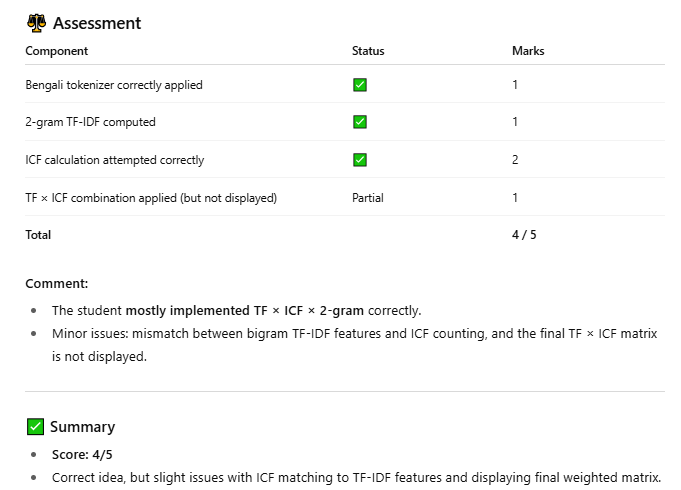

# Correct Code

In [ ]:
# -*- coding: utf-8 -*-
# TF × ICF × 2-Gram for Bengali Text
# -----------------------------------

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from bnltk.tokenize import Tokenizers

# -------------------------------
# 1. Example Bengali Corpus
# -------------------------------
data = pd.DataFrame({
    "text": [
        "আমি ভাত খাই", "আমি মাছ খাই",
        "আমি গান শুনি", "বাংলা গান সুন্দর",
        "আমি বই পড়ি", "তুমি গান শুনো",
        "সে ভাত খায়", "তারা মাছ খায়"
    ],
    "category": [
        "food", "food", "music", "music",
        "books", "music", "food", "food"
    ]
})

# -------------------------------
# 2. Bengali Tokenizer
# -------------------------------
bn_tokenizer = Tokenizers()

def bengali_tokenizer(text):
    return bn_tokenizer.bn_word_tokenizer(text)

# -------------------------------
# 3. Compute TF using 2-grams
# -------------------------------
vectorizer = TfidfVectorizer(
    tokenizer=bengali_tokenizer,
    ngram_range=(2, 2),  # bigrams only
    use_idf=False         # TF only for now
)

X_tf = vectorizer.fit_transform(data['text'])
feature_names = vectorizer.get_feature_names_out()

# -------------------------------
# 4. Compute ICF (Inverse Category Frequency)
# -------------------------------
categories = data['category'].unique()
C = len(categories)

# Map each word/bigram to categories it appears in
word_category_count = {}

for word in feature_names:
    cats_with_word = set()
    for cat in categories:
        docs_in_cat = data[data['category']==cat]['text']
        for doc in docs_in_cat:
            tokens = bengali_tokenizer(doc)
            bigrams = [' '.join(tokens[i:i+2]) for i in range(len(tokens)-1)]
            if word in bigrams:
                cats_with_word.add(cat)
                break
    word_category_count[word] = len(cats_with_word)

# Compute ICF
icf = np.array([np.log((C + 1) / (word_category_count[word] + 1)) + 1 for word in feature_names])

# -------------------------------
# 5. TF × ICF
# -------------------------------
X_tf_icf = X_tf.multiply(icf)

# -------------------------------
# 6. Display final weighted matrix
# -------------------------------
tf_icf_df = pd.DataFrame(X_tf_icf.toarray(), columns=feature_names)
print("TF × ICF Weighted 2-gram Matrix:\n")
print(tf_icf_df.round(4))

Missing: Word2Vec+CBOW+Skipgram

In [ ]:
# -----------------------------
# Word2Vec Embeddings + CBOW + Skip-gram
# -----------------------------
# !pip install gensim

from gensim.models import Word2Vec

# Sample dataset
sentences = [
    ["the", "cat", "sits", "on", "the", "mat"],
    ["dogs", "are", "loyal", "animals"],
    ["cats", "are", "beautiful", "creatures"],
    ["the", "dog", "chased", "the", "cat"],
    ["birds", "fly", "in", "the", "sky"],
    ["fish", "swim", "in", "the", "water"],
    ["students", "are", "studying", "in", "the", "classroom"]
]

# -----------------------------
# 1. Train Word2Vec Embeddings (default CBOW)
# -----------------------------
word2vec_model = Word2Vec(sentences, vector_size=50, window=3, sg=0, min_count=1, epochs=100)
print("=== Word2Vec Embeddings ===")
print("Vector for 'cat':\n", word2vec_model.wv['cat'])
print("Vocabulary:", list(word2vec_model.wv.index_to_key))
print("-" * 60)

# -----------------------------
# 2. CBOW Model (sg=0)
# -----------------------------
cbow_model = Word2Vec(sentences, vector_size=50, window=3, sg=0, min_count=1, epochs=100)
print("=== CBOW Model ===")
print("Vector for 'dog':\n", cbow_model.wv['dog'])
print("Most similar to 'dog':", cbow_model.wv.most_similar('dog', topn=5))
print("-" * 60)

# -----------------------------
# 3. Skip-gram Model (sg=1)
# -----------------------------
skipgram_model = Word2Vec(sentences, vector_size=50, window=3, sg=1, min_count=1, epochs=100)
print("=== Skip-gram Model ===")
print("Vector for 'dog':\n", skipgram_model.wv['dog'])
print("Most similar to 'dog':", skipgram_model.wv.most_similar('dog', topn=5))
print("-" * 60)

# -----------------------------
# 4. Using Word2Vec embeddings for similarity
# -----------------------------
similarity_score = word2vec_model.wv.similarity('cat', 'dog')
print("Similarity between 'cat' and 'dog' (Word2Vec embeddings):", similarity_score)

Missing: GloVe+Skipgram

In [ ]:
# -*- coding: utf-8 -*-
# GloVe + Skip-gram for Bengali Text
# ---------------------------------
from bnltk.tokenize import Tokenizers
import numpy as np
import itertools
from collections import defaultdict
import random

# -------------------------------
# Step 1: Example Bengali Corpus
# -------------------------------
corpus = [
    "আমি ভাত খাই",
    "সে মাছ খায়",
    "আমি বাজারে যাই",
    "সে স্কুলে যায়",
    "আমরা সবাই মিলে খেলাধুলা করি"
]

# -------------------------------
# Step 2: Tokenization (bnltk)
# -------------------------------
bn_tokenizer = Tokenizers()

def tokenize(text):
    return bn_tokenizer.bn_word_tokenizer(text)

tokenized_corpus = [tokenize(sent) for sent in corpus]

# -------------------------------
# Step 3: Build Vocabulary
# -------------------------------
vocab = set(itertools.chain(*tokenized_corpus))
word2id = {word: i for i, word in enumerate(vocab)}
id2word = {i: word for word, i in word2id.items()}
vocab_size = len(vocab)

# -------------------------------
# Step 4: Build Co-occurrence Matrix (Skip-gram like window)
# -------------------------------
def build_cooccurrence_skipgram(corpus, window_size=2):
    cooccurrence = defaultdict(float)
    for tokens in corpus:
        for i, word in enumerate(tokens):
            word_id = word2id[word]
            start = max(i - window_size, 0)
            end = min(i + window_size + 1, len(tokens))
            for j in range(start, end):
                if i != j:
                    context_id = word2id[tokens[j]]
                    cooccurrence[(word_id, context_id)] += 1.0
    return cooccurrence

cooccurrence_skipgram = build_cooccurrence_skipgram(tokenized_corpus, window_size=2)


# -------------------------------
# Step 5: Train GloVe Embeddings (using Skip-gram co-occurrence)
# -------------------------------
def train_glove(cooccurrence, vocab_size, embedding_dim=50,
                alpha=0.75, x_max=100, learning_rate=0.05, epochs=100):

    W = np.random.rand(vocab_size, embedding_dim) / np.sqrt(embedding_dim)
    W_context = np.random.rand(vocab_size, embedding_dim) / np.sqrt(embedding_dim)
    biases = np.zeros(vocab_size)
    biases_context = np.zeros(vocab_size)

    cooccurrence_list = [(k[0], k[1], v) for k, v in cooccurrence.items()]

    for epoch in range(epochs):
        total_loss = 0
        random.shuffle(cooccurrence_list) # Shuffle for SGD

        for i, j, x_ij in cooccurrence_list:
            w_i = W[i]
            w_j = W_context[j]
            b_i = biases[i]
            b_j = biases_context[j]

            weight = (x_ij / x_max) ** alpha if x_ij < x_max else 1.0
            inner_product = np.dot(w_i, w_j) + b_i + b_j
            cost = inner_product - np.log(x_ij)

            # Loss
            loss = weight * (cost ** 2)
            total_loss += 0.5 * loss

            # Gradients
            grad = weight * cost
            W[i] -= learning_rate * grad * w_j
            W_context[j] -= learning_rate * grad * w_i
            biases[i] -= learning_rate * grad
            biases_context[j] -= learning_rate * grad

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss={total_loss:.4f}")

    return W + W_context

embeddings_skipgram = train_glove(cooccurrence_skipgram, vocab_size, embedding_dim=20, epochs=50)

# -------------------------------
# Step 6: Check Word Embeddings
# -------------------------------
def get_embedding(word):
    idx = word2id.get(word, None)
    if idx is not None:
        return embeddings_skipgram[idx]
    else:
        return None

print("\nGloVe Skip-gram Word Embedding for 'আমি':\n", get_embedding("আমি"))
print("\nGloVe Skip-gram Word Embedding for 'ভাত':\n", get_embedding("ভাত"))